# P2 - INVESTIGATE A DATASET

As a Data Analysis Project we will do the data analysis on the Titanic Data orginally obtained from the Kaggle website.

**Titanic Data** - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variable description as per the Kaggle website is shown below. We will do data exploration, data munging and apply various statistical analysis and visualsation methods on the sample dataset  to tentatively predict the factors that _made people more likely to survive_.  

In the process of data analysis and to predict the factors affecting the survival of the passengers, we will try to find the answers to the following questions through data exploration & visualisation menthods:

### Questions:

1. _** Were Age a factor effecting the rate of survival? ** _

2. _** Did women and children have greater chance of survival irrespective of other factors i.e. Class or place of Embarkment? ** _

3. _**Were the Socio-economic status (SES) a factor effecting the survival rate?**_

4. _**Were the station of embarkment a factor effecting the survival rate?**_

5. _**Were having family/relatives on board a factor effecting survival rates?**_


###  VARIABLE DESCRIPTIONS:

    + survival        Survival(0 = No; 1 = Yes)

    + pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

    + name            Name

    + sex             Sex

    + age             Age

    + sibsp           Number of Siblings/Spouses Aboard

    + parch           Number of Parents/Children Aboard

    + ticket          Ticket Number

    + fare            Passenger Fare

    + cabin           Cabin

    + embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### SPECIAL NOTES:

**Pclass**  is a proxy for socio-economic status (SES)  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

 **Age** is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. sibsp and parch)
    some relations were ignored.  The following are the definitions used
    for sibsp and parch.

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent:   Mother or Father of Passenger Aboard Titanic
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however,the definitions do not support such relations.

#### Importing useful libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Data Wrangling & Exploration

 Importing the dataset as Pandas DataFrame Object.

In [2]:
df = pd.read_csv("titanic_data.csv")

We will see the first few rows of data to get the basic details like index & column fields.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets find out the information about No. of entries in each field, missing values and type of variables in the dataset.

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The above result states that There are total 891 passenger entries in the dataset. However there are only 714 entries in Age column, 204 entrie in Cabin & 889 entries in Embarked columns suggesting missing values in the data set.

#### There are two types of variable in our dataset:
1. Categorical Variables: Pclass, Sex and Embarked
2. Numeric Variables: Age, SibSp, Parch, Fare

Lets find out some statistical data  about the dataset.

In [5]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch','Cabin']].describe(include = 'all')

,Survived,Pclass,Age,Fare,SibSp,Parch,Cabin
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,204
unique,NaN,NaN,NaN,NaN,NaN,NaN,147
top,NaN,NaN,NaN,NaN,NaN,NaN,C23 C25 C27
freq,NaN,NaN,NaN,NaN,NaN,NaN,4
mean,0.383838,2.308642,29.699118,32.204208,0.523008,0.381594,NaN
std,0.486592,0.836071,14.526497,49.693429,1.102743,0.806057,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,20.125000,7.910400,0.000000,0.000000,NaN
50%,0.000000,3.000000,28.000000,14.454200,0.000000,0.000000,NaN
75%,1.000000,3.000000,38.000000,31.000000,1.000000,0.000000,NaN


The above test gives following information about the dataset:
* The mean age of the passengers travelling was 29.7 and median age (i.e. 50%) is 28 with minimum age 0.42 and maximum age 80 years.
* 38% of the passengers survived.
* More than 50% of the Passengers in Data Set belongs to Pclass 3.
* The fare seems to have values with 0 indicating possibility of some free tickets or data errors. On the other extreme, 512 seems a possible outlier / error.The mean fare was 32 Pounds whereas 75% passengers paid less than 32 Pounds. This suggest outlier data. The median fare was less than 15 Pounds.

* 75% of the passengers with age listed were under the age of 38, and the mean age overall was 29.7.

Notice that the mean is greater than the median.This is common for a distribution that is skewed to the right. 

Survived is just an integer variable that takes on the value 0 or 1 depending on whether a passenger died or survived respectively. Variables that indicate a state or the presence or absence of something with the numbers 0 and 1 are sometimes called indicator variables or dummy variables (0 indicates absence and 1 indicates presence.). Indicator variables are essentially just a shorthand for encoding a categorical variable with 2 levels. We could instead encode Survived as a categorical variable with more descriptive categories. However we will leave it as 0 & 1 for the ease of analysis & visualisation in seaborn.

There's one more variable that has a questionable data encoding: Pclass. Pclass is an integer that indicates a passenger's class, with 1 being first class, 2 being second class and 3 being third class. Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric variable. What's more 1st class would be considered "above" or "higher" than second class, but when encoded as an integer, 1 comes before 2. We can fix this by transforming Pclass into an ordered categorical variable:

Also Cabin and Ticket columns have many missing values(only 714 and 204 entries respectively) hence are not very useful for data analysis point of view. We will drop these columns. Further Name & PassengerId is also insignificant for data analysis perspective. Hence we will drop them also.    

In [6]:
new_Pclass = pd.Categorical(df["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"]) 
df['Pclass'] = new_Pclass

In [7]:
new_Sex = pd.Categorical(df["Sex"],
                           ordered=True)

new_Sex = new_Sex.rename_categories(["female","male"]) 
df['Sex'] = new_Sex

In [8]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

The above result confirms the change in datatype for Pclass & Sex.

We can get a summary of the categorical variables by passing only those columns through describe.

In [9]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index([u'Name', u'Ticket', u'Cabin', u'Embarked'], dtype='object')


,Name,Ticket,Cabin,Embarked
count,891,891,204,889
unique,891,681,147,3
top,"Graham, Mr. George Edward",CA. 2343,C23 C25 C27,S
freq,1,7,4,644


The categorical variable summary shows the count of non-NaN records, the number of unique categories, the most frequently occurring value and the number of occurrences of the most frequent value. First We will check for duplicate entries and will remove them before analysis process.

In [10]:
passenger_count = df['PassengerId'].value_counts()
print 'total No. of passengers onboard is {}'.format(passenger_count.sum())

total No. of passengers onboard is 891


This shows that there are 891 unique passengers in the dataset provided.

The Cabin & Ticket contains NA values and are not useful for statistical analysis purpose, also PassengerId and Name are also 
not useful for analysis purpose, hence we will drop them before further analysis.

In [11]:
df=df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis = 1)

## Cleaning the NA values 

In [12]:
print df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


The above result indicates that only Age & Embarked column are with missing values.

In [13]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

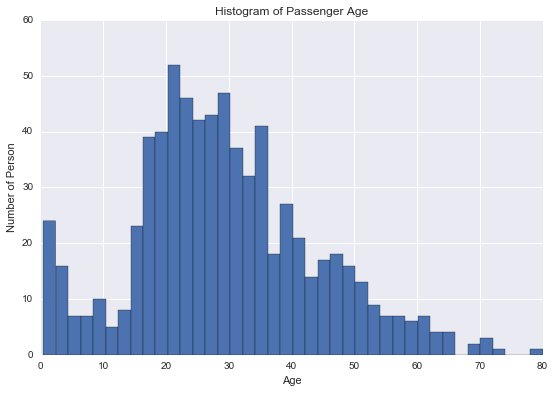

In [14]:
df.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

From the histogram above, we can observe that a lot of children under 5 years age were onboard. Some of them were babies under 1 year as evident from the peak around 1 year.This histogram would have an almost normal distribution if there wasn't a peak around 1 year old. This is also evident from the statistical result where the mean & median are different. For a normal distribution mean & median should be same. 
Overall the histogram plot shows that the passenger's age is distributed around late 20's. Now let us investigate the distribution of age in passengers who survived and who couldnt survive.

In [15]:
df.groupby('Survived').Age.describe().unstack(level=0)

Survived,0,1
count,424.000000,290.000000
mean,30.626179,28.343690
std,14.172110,14.950952
min,1.000000,0.420000
25%,21.000000,19.000000
50%,28.000000,28.000000
75%,39.000000,36.000000
max,74.000000,80.000000


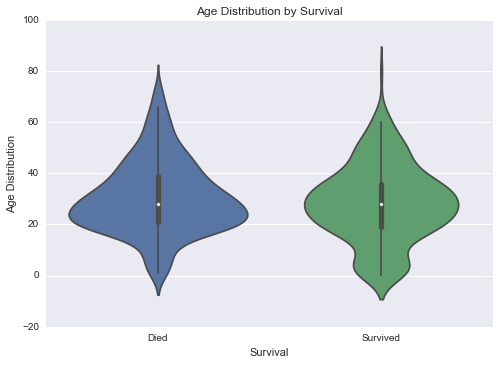

In [16]:
p = sns.violinplot(data = df, x = 'Survived', y = 'Age')
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);

We can see from the statistics & violin plot, that the distribution is a little bit different.The distribution of the age shows bimodal distribution of people who survived. The first peak is caused by the fact that all the babies less than one year old were saved. The second peak shows that maximum survivors were between age 20-36 years. However, maximum passengers who died were also in the age bracket of 20-40 years. Many old people died from the tragedy, though we see an 80 year-old man did survive the tragedy. 

There are missing values in the age column, but as our primary goal is to create a good predictor, filling missing value in Age column with mean/median is not a good idea as it can affect the distribution. We will rather create a seperate variable with passangers only with valic Age variable by removing the missing values. We will use this variable when we will do some calculation based on Age column.

In [17]:
df_age_cleaned = df.dropna(axis = 0)

In [18]:
df_age_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null category
Sex         712 non-null category
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 40.4+ KB


In [19]:
df_age_cleaned.groupby(['Pclass'])[['Age']].mean()

,Age
Pclass,
Class1,38.105543
Class2,29.877630
Class3,25.140620


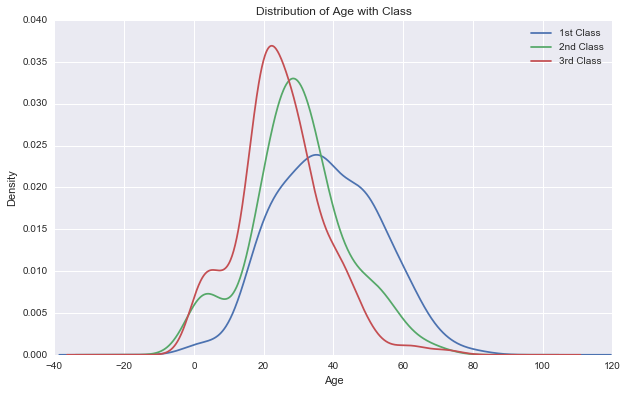

In [20]:
df_age_cleaned.Age[df_age_cleaned.Pclass == 'Class1'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Pclass == 'Class2'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Pclass == 'Class3'].plot(kind='kde', figsize=(10,6))
plt.title("Distribution of Age with Class")
plt.xlabel("Age")
plt.legend(('1st Class','2nd Class','3rd Class'),loc='best') 
plt.grid(b=True)


Here, we are looking at the age distribution of passengers by class.
It's be obvious that the density would be high for Class 3 people but spread is more for Class 1 passengers.
However it is observed that :
_* 1. Younger people (20-30) travel more in Class 3.*_
_* 2. Older poeple (55 onwards) travel more in Class 1.*_
The same is also evident from the mean values calculated above.

In [21]:
df_age_cleaned.groupby(['Embarked'])[['Age']].mean()

,Age
Embarked,
C,30.814769
Q,28.089286
S,29.445397


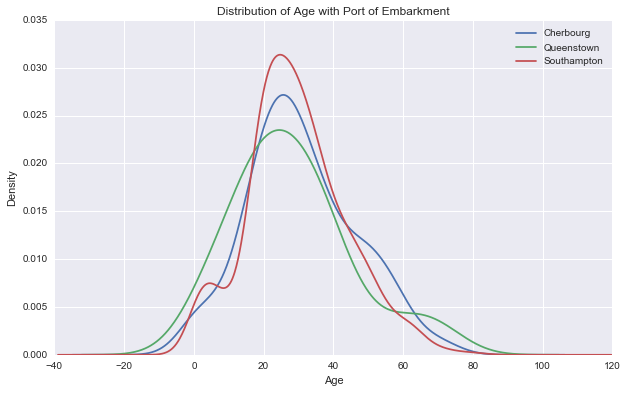

In [22]:
df_age_cleaned.Age[df_age_cleaned.Embarked == 'C'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Embarked == 'Q'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Embarked == 'S'].plot(kind='kde', figsize=(10,6))
plt.title("Distribution of Age with Port of Embarkment")
plt.xlabel("Age")
plt.legend(('Cherbourg','Queenstown','Southampton'),loc='best') 
plt.grid(b=True)

Here we look at the Age distribution of passengers by port of embarkment. Its evident that the density is high for port Queenstown. younger people (20 -30) embarked more from Port Queenstown. Also more babies (under age 1) embarked from Southampton. Passengers under age 50-60 range were majorly embarked from Cherbourg & Southampton.

### Port of maximum embarkment.

In [23]:
max_embark = df.Embarked.value_counts().argmax() 
max_embark

'S'

#### Filling the NA value in Embarked column with port with maximum embarkment.

In [24]:
df.Embarked = df.Embarked.fillna(max_embark) 

Now we will try to inverstigate the outlier data.We will investigate the 'Fare' variable by using histogram and KDE plot.

In [25]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

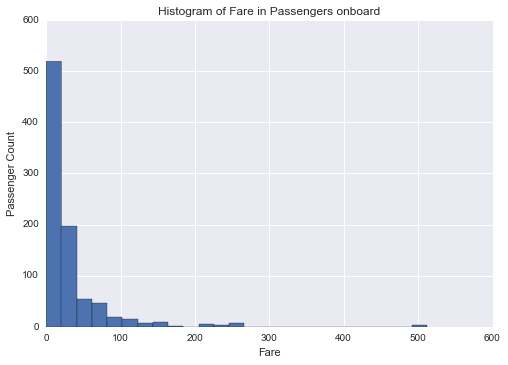

In [26]:
df.Fare.plot(kind='hist', bins = 25)
sns.plt.title("Histogram of Fare in Passengers onboard")
plt.xlabel("Fare")
plt.ylabel("Passenger Count")

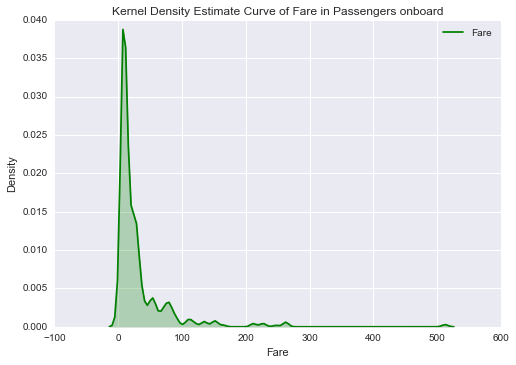

In [27]:
sns.kdeplot(df.Fare, shade = True, color = "g")
sns.plt.title("Kernel Density Estimate Curve of Fare in Passengers onboard")
plt.xlabel("Fare")
plt.ylabel("Density")

The above statistics shows that the median fare was only 14.4 Pounds and almost 75% passengers were paying 31 Pound or less for the trip. However, the maximum ticket fare paid was 512 Pounds i,e. possible outliers. The histogram & KDE reperesnts the same behaviour. Lets have a look of the passenger who paid this hefty amount.

In [28]:
df[df.Fare == df["Fare"].max()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,Class1,female,35.0,0,0,512.3292,C
679,1,Class1,male,36.0,0,1,512.3292,C
737,1,Class1,male,35.0,0,0,512.3292,C


This shows that there were 3 passengers who paid this huge amount. All of them were from higher socio-economic status evident from the fact that they were from Class 1. All of them embarked on Port C and fortunately all them survived.

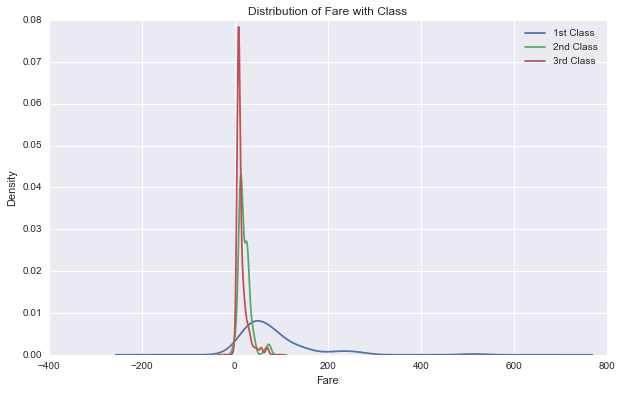

In [29]:
df.Fare[df.Pclass == 'Class1'].plot(kind='kde', figsize=(10,6))
df.Fare[df.Pclass == 'Class2'].plot(kind='kde', figsize=(10,6))
df.Fare[df.Pclass == 'Class3'].plot(kind='kde', figsize=(10,6))
plt.title("Distribution of Fare with Class")
plt.xlabel("Fare")
plt.legend(('1st Class','2nd Class','3rd Class'),loc='best') 
plt.grid(b=True)

As evident from the chart maximum density of fare is from Class 3 passengers but the spread of fare is least and minimum density is from 1st class passengers with greater spread. This denotes that the fare for 1st class passengers was higher than for 3rd class passengers and more passengers were from class 3 than from class 1 which is obvious.

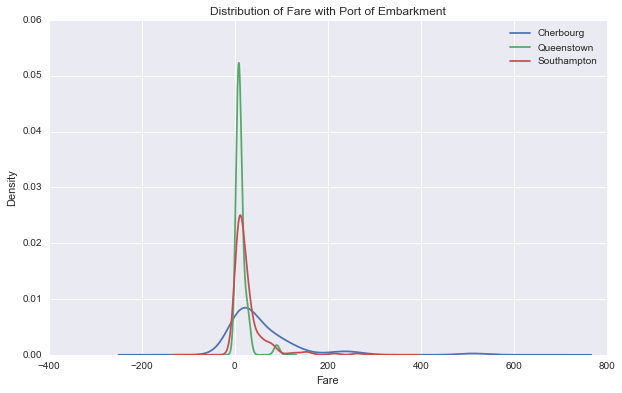

In [30]:
df.Fare[df.Embarked == 'C'].plot(kind='kde', figsize=(10,6))
df.Fare[df.Embarked == 'Q'].plot(kind='kde', figsize=(10,6))
df.Fare[df.Embarked == 'S'].plot(kind='kde', figsize=(10,6))
plt.title("Distribution of Fare with Port of Embarkment")
plt.xlabel("Fare")
plt.legend(('Cherbourg','Queenstown','Southampton'),loc='best') 
plt.grid(b=True)

The above chart shows that the density of fare is maximum for Queenstown port however the spread is minimum which indicates that mostly low class passengers boarded from Queenstown.Similarly mostly 1st class passengers boarded from Cherbourg.

First create a function to get passenger data by catagory (i.e. Pclass, Embarkment, Sex..etc)

In [31]:
def passenger_by_catagory(catagory):
    passenger_by_catagory = df[catagory].value_counts().sort_index()
    return passenger_by_catagory

#### Passenger count by Sex:

In [32]:
print passenger_by_catagory('Sex') 

female    314
male      577
dtype: int64


The above result shows that the male passengers were almost double the female passengers. The same has been plotted below.

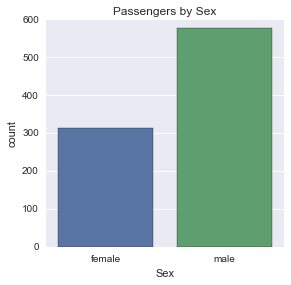

In [33]:
sns.factorplot('Sex', data = df, kind = 'count');
sns.plt.title('Passengers by Sex')

#### Passenger Count by Pclass:

In [34]:
passenger_by_catagory('Pclass')

Class1    216
Class2    184
Class3    491
dtype: int64

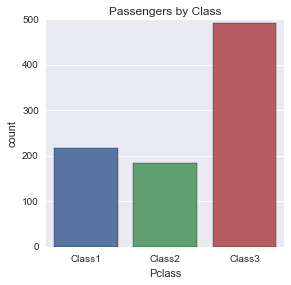

In [35]:
sns.factorplot('Pclass', data = df, kind = 'count')
sns.plt.title('Passengers by Class')

The above result shows that most of the passengers belong to lower class i.e. Class 3 

#### Passenger Count by Port of Embarkment:

In [36]:
passenger_by_catagory('Embarked')

C    168
Q     77
S    646
Name: Embarked, dtype: int64

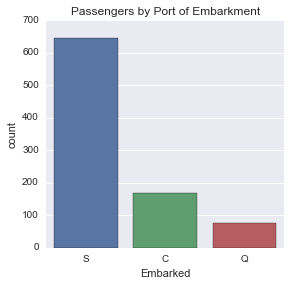

In [37]:
sns.factorplot('Embarked', data = df, kind = 'count')
sns.plt.title('Passengers by Port of Embarkment')

The above analysis shows that male passengers were more than female passengers. Also maximum passengers were from Class 3 and most of the passengers embarked from Station S.

Now We will create a function to get the survival data catagorywise:

In [38]:
def survived_by_catagory(catagory):
    survived_by_catagory = df[df.Survived == 1].groupby(catagory).count()['Survived']
    return survived_by_catagory

In [39]:
print "No. of Passenger Survived by : {}".format(survived_by_catagory('Sex'))
print "Percentage of Passenger Survived by Sex:\n{}".format((survived_by_catagory('Sex')/passenger_by_catagory('Sex'))*100)
print "No. of Passenger Survived by : {}".format(survived_by_catagory('Pclass'))
print "Percentage of Passenger Survived by Class:\n{}".format((survived_by_catagory('Pclass')/passenger_by_catagory('Pclass'))*100)
print "No. of Passenger Survived by Station : {}".format(survived_by_catagory('Embarked'))
print "Percentage of Passenger Survived by Station Embarked:\n{}".format((survived_by_catagory('Embarked')/passenger_by_catagory('Embarked'))*100)

No. of Passenger Survived by : Sex
female    233
male      109
Name: Survived, dtype: int64
Percentage of Passenger Survived by Sex:
Sex
female    74.203822
male      18.890815
dtype: float64
No. of Passenger Survived by : Pclass
Class1    136
Class2     87
Class3    119
Name: Survived, dtype: int64
Percentage of Passenger Survived by Class:
Pclass
Class1    62.962963
Class2    47.282609
Class3    24.236253
dtype: float64
No. of Passenger Survived by Station : Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64
Percentage of Passenger Survived by Station Embarked:
Embarked
C    55.357143
Q    38.961039
S    33.900929
dtype: float64


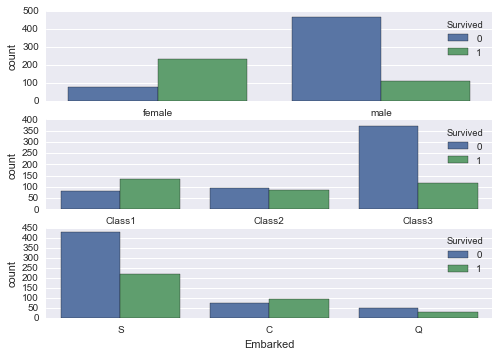

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(3)
sns.countplot(x = "Sex", hue = "Survived", data=df, ax = ax1)
sns.countplot(x = "Pclass", hue = "Survived", data=df, ax = ax2)
sns.countplot(x = "Embarked", hue = "Survived", data=df, ax = ax3)

##### The above results & three barplots give following informations about the dataset:
1. Maximum No. of passanger survived were females(74% of the total passengers in the dataset).
2. Maximum passengers who survived were Class 1 passengers.
3. Maximum survivors were having station of embarkment as S.

In [41]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


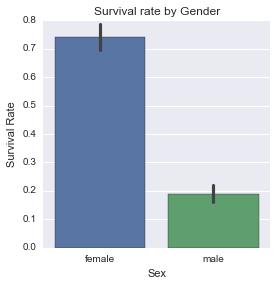

In [42]:
sns.factorplot(x="Sex", y="Survived",kind='bar', data=df)
sns.plt.title('Survival rate by Gender')
plt.ylabel("Survival Rate")

The above statistics & plot shows that overall survival rate of female was very high (74%) compared to males (~19%).

In [43]:
df.groupby(['Sex', 'Pclass'])[['Survived']].mean()

Survived
Sex    Pclass          
female Class1  0.968085
       Class2  0.921053
       Class3  0.500000
male   Class1  0.368852
       Class2  0.157407
       Class3  0.135447

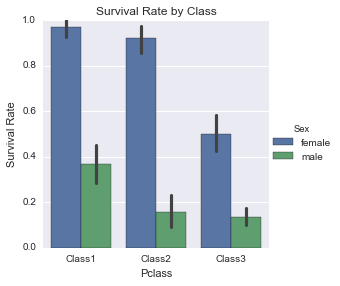

In [44]:
sns.factorplot(x="Pclass", y="Survived", hue = 'Sex',kind='bar', data=df)
sns.plt.title('Survival Rate by Class')
plt.ylabel("Survival Rate")

The above result shows that Female survival rates were very high across all classes compared to males. Overall Class 1 survival rates were maximum in both males & females.

In [45]:
df.groupby(['Sex', 'Embarked'])[['Survived']].mean()

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.692683
male   C         0.305263
       Q         0.073171
       S         0.174603

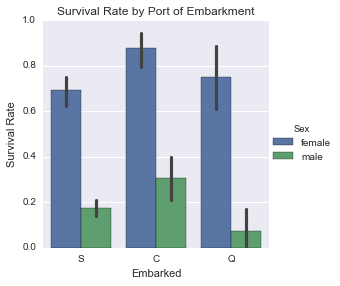

In [46]:
sns.factorplot(x="Embarked", y="Survived", hue = 'Sex',kind='bar', data=df)
sns.plt.title('Survival Rate by Port of Embarkment')
plt.ylabel("Survival Rate")

Similarly Survival Rate of female is higher than males across all port of embarkment, with maximum rate of survival for port C. The point to note here is for Port Q although the female survival rate is more than S, male survival rate is comparatively less. Overall a female with port of embarkment C and Pclass 1 has higher chance of survival.

Let's calculate maximum & minimum age of the Passenger Survived

In [47]:
max_age_survived = df[df.Survived == 1].Age.max()
min_age_survived = df[df.Survived == 1].Age.min()
print 'The maximum age of passenger survived is {}'.format(max_age_survived)
print 'The minimum age of passenger survived is {}'.format(min_age_survived)


The maximum age of passenger survived is 80.0
The minimum age of passenger survived is 0.42


Similarly Maximum & Minimum age of the Passenger Died:

In [48]:

max_age_died = df[df.Survived == 0].Age.max()
min_age_died = df[df.Survived == 0].Age.min()
print 'The maximum age of passenger died is {}'.format(max_age_died)
print 'The minimum age of passenger died is {}'.format(min_age_died)

# This shows that all the kids below 1 year age were saved.

The maximum age of passenger died is 74.0
The minimum age of passenger died is 1.0


## Now We will analyse data to get the answers of the questioned posed in the beginning. 

### Q 1:  Were Age a factor effecting the rate of survival?

In [49]:
survivor_data = df_age_cleaned.groupby('Survived')
survivor_data.describe()

Age        Fare       Parch       SibSp
Survived                                                      
0        count  424.000000  424.000000  424.000000  424.000000
         mean    30.626179   22.965456    0.365566    0.525943
         std     14.172110   31.448825    0.878341    1.044760
         min      1.000000    0.000000    0.000000    0.000000
         25%     21.000000    7.895800    0.000000    0.000000
         50%     28.000000   11.887500    0.000000    0.000000
         75%     39.000000   26.550000    0.000000    1.000000
         max     74.000000  263.000000    6.000000    5.000000
1        count  288.000000  288.000000  288.000000  288.000000
         mean    28.193299   51.647672    0.531250    0.496528
         std     14.859146   70.664499    0.808747    0.732512
         min      0.420000    0.000000    0.000000    0.000000
         25%     19.000000   13.000000    0.000000    0.000000
         50%     28.000000   26.250000    0.000000    0.000000
         75%     36.000000   65.000000    1.000000    1.000000
         max     80.000000  512.329200    5.000000    4.000000

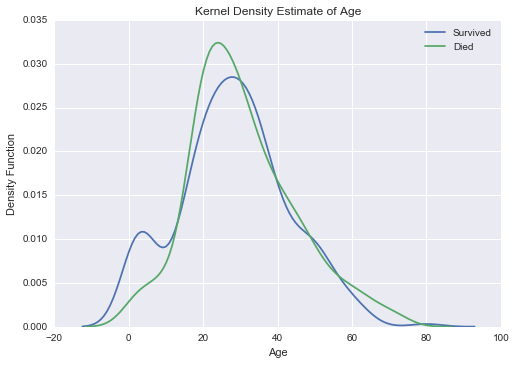

In [50]:
sns.distplot(df_age_cleaned[df_age_cleaned['Survived'] == 1].Age, kde= True, hist= False, label = "Survived");
sns.distplot(df_age_cleaned[df_age_cleaned['Survived'] == 0].Age, kde= True, hist= False, label = "Died");
sns.plt.title("Kernel Density Estimate of Age")
plt.ylabel("Density Function")

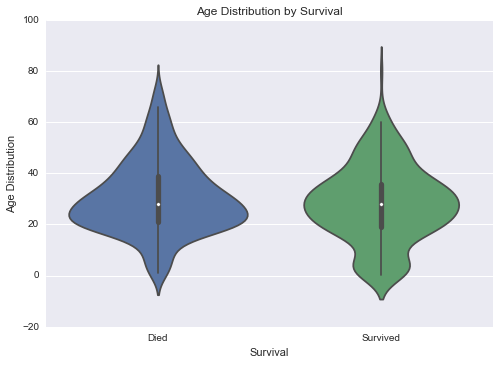

In [51]:
p = sns.violinplot(data = df_age_cleaned, x = 'Survived', y = 'Age')
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);

 A look at the Kernel Density Estimate plot & the violinplot shows that the ages of each group almost overlaps and maximum probability density is at approx age 30 years.Average age for those who survived and even those who did not survive were inline with each other and with standard deviation of about 14, the mean age for each group is well within one standard deviation of the other group. However, the case is different for young passengers (0-5 years) there is significant jump in survival density. After age 50 there is decline in survivors density confirming poor survival of old age passengers. Also as the distribution for survival is not a normal distribution, mean and standard deviation might not properly represent distribution attributes. 

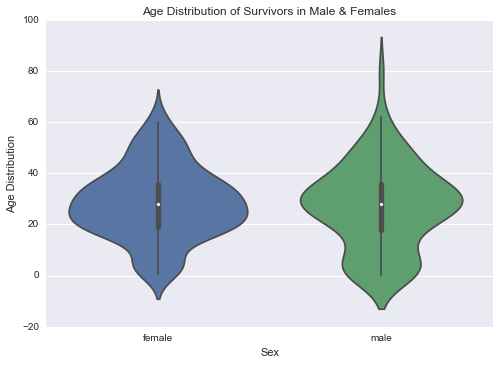

In [52]:
p = sns.violinplot(data = df_age_cleaned[df_age_cleaned.Survived == 1], x = 'Sex', y = 'Age')
p.set(title = 'Age Distribution of Survivors in Male & Females', 
        xlabel = 'Sex', 
        ylabel = 'Age Distribution');

The above violinplot shows the Age distribution of Surviors among male & female. Here if we look at the Survivors plot mean age for male & female are almost equivalent and the shape is also similar with slightly higher spreas for female survivors between 20 - 30 years age range.

 To test the effect of age on survival of passengers we will perform a <b>Mann-Whitney U-test</b> to find the U-statistic and p-value by comparing the age of passengers who survived and who couldnot survive. 

The Mann-Whitney U test (also called the Wilcoxon-Mann-Whitney test) is a rank-based nonparametric test that can be used to determine if there are differences between two groups on a continuous or ordinal dependent variable. The Mann-Whitney U test is often presented as the nonparametric alternative to the independent-samples t-test, which can be used when your data fail the assumptions of the independent-samples t-test. This could happen if: (a) you have non-normally distributed data; or (b) you have an ordinal dependent variable (i.e., the independent-samples t-test requires a continuous dependent variable). 
In this case our data is non - normally distributed one, hence Mann-Whitney test will be helpful to test the effect.

### Assumptions of Mann-Whitney U test:

<b>Assumption 1:</b> We have one dependent variable that is measured at the continuous or ordinal level. Here we have Passenger's age as dependent variable. 

<b>Assumption 2:</b> We have one independent variable that consists of two or more categorical, independent groups. In this case survival data (Survived or Died) is the independent variable.

<b>Assumption 3:</b> We should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves. 

<b>Assumption 4:</b> You must determine whether the distribution of scores for both groups of our independent variable have the same shape or a different shape. In our case the shape is different as shown in the histogram below.

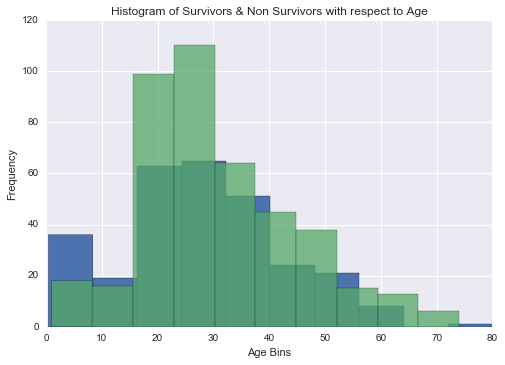

In [53]:
df_age_cleaned.Age[df_age_cleaned.Survived==1].plot(kind='hist')
df_age_cleaned.Age[df_age_cleaned.Survived==0].plot(kind='hist', alpha = 0.75)
sns.plt.title("Histogram of Survivors & Non Survivors with respect to Age")
plt.xlabel("Age Bins")

The p-value returned by scipy.stats.mannwhitneyu is one-tailed. To perform the two-tailed test, the one-tailed p-value returned by scipy.stats.mannwhitneyu is multiplied by 2. The p-critical value used in this test is 0.05 to test for significance. We're ultimately trying to determine whether Survival of Passenger varies with Age. We start by splitting the Age entries into two samples, survived & not-survived. The Mann-Whitney U-Test tests the null hypothesis that the two samples being compared are derived from the same population. This null hypothesis allows us to test whether there is a statistically significant difference in distributions of Age for Survivors & Non-survivors onboard the titanic ship.

###### Null Hypothysis : H0 -> There is no statistically significant difference in distributions of Age for Survivors & Non-survivors


###### Alternate Hypothysis: H1 -> There is statistically significant difference in distributions of Age for Survivors & Non-survivors

In [54]:
age_for_survivors= df_age_cleaned[df_age_cleaned.Survived == 1]["Age"]
survivor_mean_age = np.mean(age_for_survivors)
age_for_nonsurvivors= df_age_cleaned[df_age_cleaned.Survived == 0]["Age"]
nonsurvivor_mean_age = np.mean(age_for_nonsurvivors)

In [55]:
print "mean age for survivors: {0}\nMean age for nonsurvivors: {1}".format(survivor_mean_age,nonsurvivor_mean_age)

mean age for survivors: 28.1932986111
Mean age for nonsurvivors: 30.6261792453


In [56]:
[U,p] = sp.mannwhitneyu(age_for_survivors,age_for_nonsurvivors)
print "Mann-Whitney Test Statistic: {0}\np-Value: {1}".format(U, p)

Mann-Whitney Test Statistic: 56961.0
p-Value: 0.128371888363


The two tailed p-value is ~ 0.256 i.e. greater than the alpha level of 0.05. Hence we reject the alternate hypothesis. This indicate that there is no statistically significant difference in distributions of Age for Survivors & Non-survivors or age has no significant influence on survival of the passengers. 

### Q2 : Did women and children have greater chance of survival irrespective of other factors i.e.  Class or place of Embarkment?

#### As there is no classification for child in the dataset, we will consider Age < 18 years as child and create a new column for the same.

In [57]:
def male_female_child(passenger):
    Age,Sex = passenger
    if (Age < 18):
        return 'child'
    else:
        return Sex

In [58]:
df['People'] = df[['Age','Sex']].apply(male_female_child, axis=1)

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,People
0,0,Class3,male,22.0,1,0,7.2500,S,male
1,1,Class1,female,38.0,1,0,71.2833,C,female
2,1,Class3,female,26.0,0,0,7.9250,S,female
3,1,Class1,female,35.0,1,0,53.1000,S,female
4,0,Class3,male,35.0,0,0,8.0500,S,male


In [60]:
df.groupby(['Pclass','People']).mean()['Survived']

Pclass  People
Class1  child     0.916667
        female    0.976744
        male      0.347458
Class2  child     0.913043
        female    0.906250
        male      0.082474
Class3  child     0.371795
        female    0.486239
        male      0.121711
Name: Survived, dtype: float64

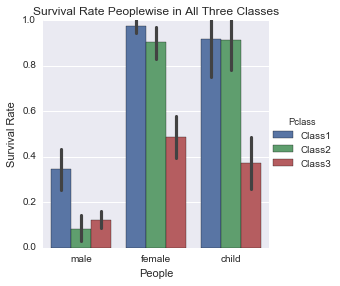

In [61]:
sns.factorplot(x="People", y="Survived", hue="Pclass",kind='bar', data=df)
sns.plt.title("Survival Rate Peoplewise in All Three Classes")
plt.ylabel("Survival Rate")

The above Statistics indicates that children & females had greater percentage of survival irrespective of Pclass compared to males. The same has been represented in factorplot above. 

In [62]:
df.groupby(['Embarked','People']).mean()['Survived']

Embarked  People
C         child     0.750000
          female    0.892857
          male      0.284091
Q         child     0.428571
          female    0.727273
          male      0.081081
S         child     0.487805
          female    0.711765
          male      0.147208
Name: Survived, dtype: float64

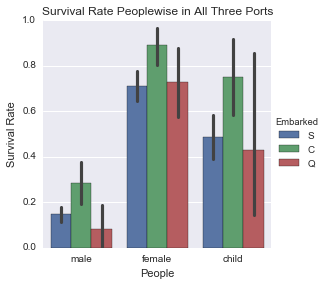

In [63]:
sns.factorplot(x="People", y="Survived",kind='bar',hue="Embarked", data=df)
sns.plt.title("Survival Rate Peoplewise in All Three Ports")
plt.ylabel("Survival Rate")

The above Statistics indicates that children & females had greater percentage of survival irrespective of Port of Embarkment compared to males. The same has been represented in factorplot above. 

###### The Statistics, factorplots shown above indicates that the female & children have greater probability of survival irrespective of Class & station of embarkment.

### Q3 : Were the Socio-economic status (SES) a factor effecting the survival rate?

Lets create a seperate dataframe for Survivors

In [64]:
df_survived = df[df.Survived == 1]

In [65]:
df_survived.groupby('Pclass').size()

Pclass
Class1    136
Class2     87
Class3    119
dtype: int64

The above statistics shows that the No. of survivors is maximum in Class 1 and minimum in Class 2. Class 3 lags behind with a very close margin from Class 1. However in the earlier data we have already seen that the No. of passengers boarded in class 3 was huge (491) hence we must calculate the rate of survivals to get a clear picture. The countplot shown below represents the same statistics calculated above.

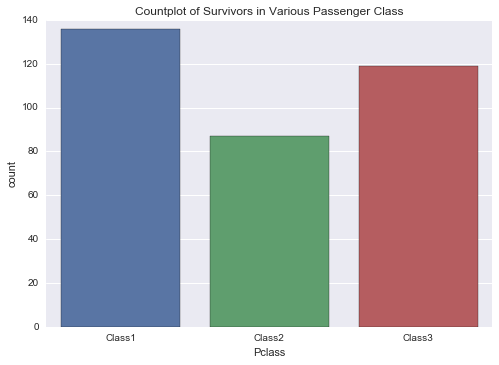

In [66]:
sns.countplot(x="Pclass",data=df_survived)
sns.plt.title("Countplot of Survivors in Various Passenger Class")

In [67]:
df.groupby(['Pclass']).mean()['Survived']

Pclass
Class1    0.629630
Class2    0.472826
Class3    0.242363
Name: Survived, dtype: float64

The above statistics shows that Survival rate in Class 1 was highest.
1. Class 1 - survival rate: 62.96%
2. Class 2 - survival rate: 47.28%
3. Class 3 - survival rate: 24.23%

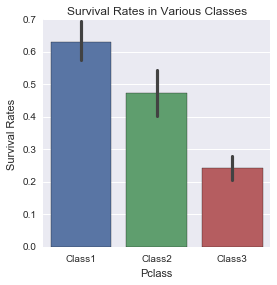

In [68]:
sns.factorplot(x="Pclass", y="Survived", kind='bar', data=df)
sns.plt.title("Survival Rates in Various Classes")
plt.ylabel("Survival Rates")

The above factorplot represents the same information calculated from the statistics that Survival rate in Class 1 was highest and in class 3 it was lowest.

In [69]:
df.groupby(['Pclass', 'Sex']).mean()['Survived']

Pclass  Sex   
Class1  female    0.968085
        male      0.368852
Class2  female    0.921053
        male      0.157407
Class3  female    0.500000
        male      0.135447
Name: Survived, dtype: float64

The above statistics shows the sexwise survival rates in various classes. This also indicates that irrespective of sex survival rate in class 1 was maximum and Class 3 was minimum.
1. Class 1 - female survival rate: 96.81%
2. Class 1 - male survival rate: 36.89%
3. Class 2 - female survival rate: 92.11%
4. Class 2 - male survival rate: 15.74%
5. Class 3 - female survival rate: 50.0%
6. Class 3 - male survival rate: 13.54%

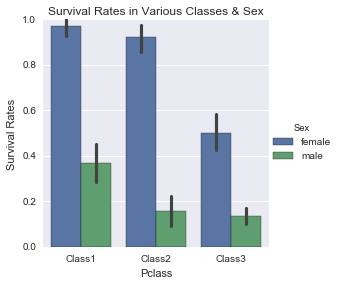

In [70]:
sns.factorplot(x="Pclass", y="Survived", hue = 'Sex', kind='bar', data=df)
sns.plt.title("Survival Rates in Various Classes & Sex")
plt.ylabel("Survival Rates")

The same has been represented in the above bar plot.

 Based on the absolute numbers calculated above the No. of passengers survived in class1 and class3 are almost identical, however comparing the rate of survival in each class we can see that class 1 has the highest survival rate of approx 63% whereas survival rate in class 3 is lowest at around 24% only. As the passenger class represents the socio - economical status of a  passanger it seems that SES was a factor.

#### To test this we will take the help of hypothesis testing.
The hypothesis for this question is that the social class does impact the chances of survival
1. H0 = Social Class has no impact on survivability -> Null Hypothesis
2. HA = Social Class does impact the chances of survivability -> Alternate Hypothesis

In [71]:
obs = pd.crosstab(df['Survived'],df['Pclass'])

The Chi-Square test of Independence is used to determine if there is a significant relationship between two nominal (categorical) variables.  The frequency of one nominal variable is compared with different values of the second nominal variable. Here we will use the same to test the hypothesis.

In [72]:
[chi2, p, dof, ex] = sp.chi2_contingency(obs.values)

In [73]:
print "Chi-Squared Statistic: {0}\np-Value: {1}".format(chi2, p)

Chi-Squared Statistic: 102.888988757
p-Value: 4.5492517113e-23


As expected, given the extremely low p-value , the test result detects a significant relationship between the variables i.e. we can reject Null hypothesis and can say that SES does impact the chance of survival.

### Q4: Were the station of embarkment a factor effecting the survival rate?

In [74]:
df_survived.groupby('Embarked').size()

Embarked
C     93
Q     30
S    219
dtype: int64

The above statistics shows that the No. of survivors is maximum in station S and minimum in Station Q. However in the earlier data we have already seen that the No. of passengers boarded in port S was huge (>600) hence we must calculate the rate of survivals to get a clear picture. The countplot shown below represents the same statistics calculated above.

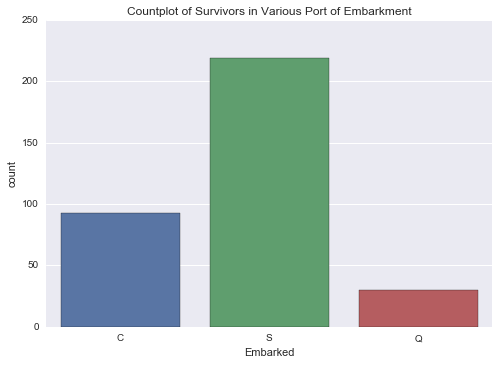

In [75]:
sns.countplot(x="Embarked",data=df_survived)
sns.plt.title("Countplot of Survivors in Various Port of Embarkment")

In [76]:
df.groupby(['Embarked']).mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

The above statistics shows that Survival rate in Port C was highest.
1. Port C - survival rate: 55.35%
2. Port Q - survival rate: 38.96%
3. Port S - survival rate: 33.90%

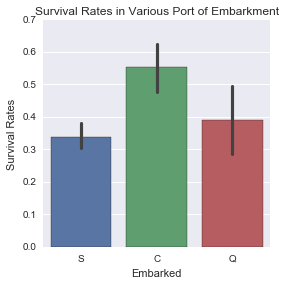

In [77]:
sns.factorplot(x="Embarked", y="Survived", kind='bar', data=df)
sns.plt.title("Survival Rates in Various Port of Embarkment")
plt.ylabel("Survival Rates")

The above factorplot represents the same information calculated from the statistics that Survival rate in port C was highest and in port S it was lowest.

In [78]:
df.groupby(['Embarked', 'Sex']).mean()['Survived']

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.692683
          male      0.174603
Name: Survived, dtype: float64

The above statistics shows the sexwise survival rates in various ports. This also indicates that irrespective of sex survival rate in port C was maximum and port S was minimum.
1. Port C - female survival rate: 87.67%
2. Port C - male survival rate: 30.52%
3. Port Q - female survival rate: 75%
4. Port Q - male survival rate: 07.32%
5. Port S - female survival rate: 69.27%
6. Port S - male survival rate: 17.46%

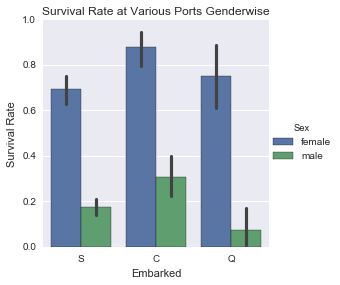

In [79]:
sns.factorplot(x="Embarked", y="Survived", hue = 'Sex', kind='bar', data=df)
sns.plt.title("Survival Rate at Various Ports Genderwise")
plt.ylabel("Survival Rate")

The same has been represented in the above bar plot. The above results and plot shows a higher probability of overall survival for passengers embarked on station C and lowest overall survival probability for passengers embarked on station S.

Lets take help of hypothesis testing to come to the conclusion whether the port of embarkment effected the survival rates or not. Again we will take help of Chi-Squared test of independence to test the hypothesis.

1. Null Hypothesis H0 -> Port of Embarkment has no impact on survival
2. Alternate Hypothesis HA = Port of Embarkment does impact the chances of survival

In [80]:
obs = pd.crosstab(df['Survived'],df['Embarked'])
[chi2, p, dof, ex] = sp.chi2_contingency(obs.values)
print "Chi-Squared Statistic: {0}\np-Value: {1}".format(chi2, p)

Chi-Squared Statistic: 25.9644528819
p-Value: 2.30086264814e-06


As evident from the statistical analysis, given the extremely low p-value , the test result detects a significant relationship between the variables i.e. we can reject Null hypothesis and can say that port of embarkment does impact the chance of survival.

### Q5 : Were having family/relatives on board a factor effecting survival rates i.e. Did passengers with family or relatives have greater chance of survival than passenger without family??

In [81]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,People
0,0,Class3,male,22.0,1,0,7.2500,S,male
1,1,Class1,female,38.0,1,0,71.2833,C,female
2,1,Class3,female,26.0,0,0,7.9250,S,female
3,1,Class1,female,35.0,1,0,53.1000,S,female
4,0,Class3,male,35.0,0,0,8.0500,S,male


In [82]:
def family_status(passenger):
    SibSp, Parch = passenger
    if (SibSp + Parch  > 0):
        return 'yes'
    else:
        return 'No'

In [83]:
df['Family'] = df[['SibSp','Parch']].apply(family_status, axis=1)

In [84]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,People,Family
0,0,Class3,male,22.0,1,0,7.2500,S,male,yes
1,1,Class1,female,38.0,1,0,71.2833,C,female,yes
2,1,Class3,female,26.0,0,0,7.9250,S,female,No
3,1,Class1,female,35.0,1,0,53.1000,S,female,yes
4,0,Class3,male,35.0,0,0,8.0500,S,male,No


In [85]:
df.groupby(["Family", "Survived"]).size()

Family  Survived
No      0           374
        1           163
yes     0           175
        1           179
dtype: int64

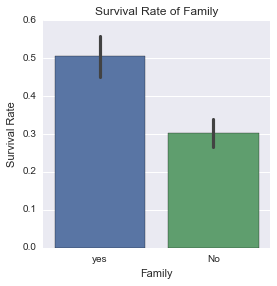

In [86]:
sns.factorplot(x="Family", y="Survived",kind='bar', data=df)
sns.plt.title("Survival Rate of Family")
plt.ylabel("Survival Rate")

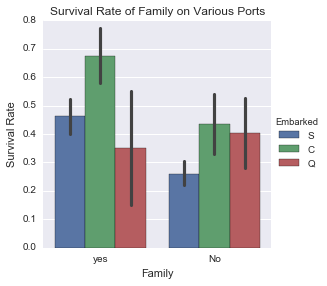

In [87]:
sns.factorplot(x="Family", y="Survived",kind='bar', hue = "Embarked", data=df)
sns.plt.title("Survival Rate of Family on Various Ports")
plt.ylabel("Survival Rate")

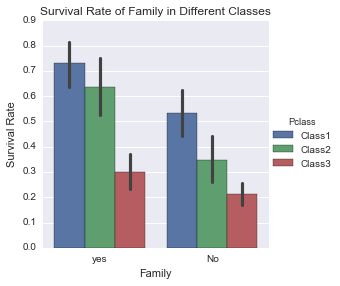

In [88]:
sns.factorplot(x="Family", y="Survived",kind='bar', hue = "Pclass", data=df)
sns.plt.title("Survival Rate of Family in Different Classes")
plt.ylabel("Survival Rate")

In [89]:
obs = pd.crosstab(df['Survived'],df['Family'])
[chi2, p, dof, ex] = sp.chi2_contingency(obs.values)
print "Chi-Squared Statistic: {0}\np-Value: {1}".format(chi2, p)

Chi-Squared Statistic: 36.0005144677
p-Value: 1.97265438465e-09


 Based on the absolute numbers calculated above the No. of passengers survived with family/relatives onboard and without family/relatives are almost identical, however comparing the rate of survival in each class we can tentatively say that passenger with family/relatives onboard has the higher chance of survival i.e. family/relative is also one of the factors effecting the chance of survival.

## Conclusions:

As per the Kaggle website On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Here we have taken a dataset of only 891 passengers. There was no information about the crew data in the dataset. Limiting to a smaller dataset can only predict the probability of survival. Also, we had a lot of missing data in the Age column, and we removed the passengers with missing age from our analysis related to age variable, it further reduced the sample size. This limitation might have a great deal of impact on analysis fo survival based on Age.

Even though we were given many features of passengers in our data, we found that most of the features were not useful in classification. For example, the number of sibling/spouses and the number of parents/children did not help with classification.
Knowing the number of relatives aboard did not help with classification, but perhaps, if we were given the links between passengers then we’d be able to infer more about the survival rate. Since family units tend to all die or all survive, knowing the family links would have been useful. 

Also Due to a lot of missing values in cabin data, the same was not useful for analysis and was ommitted from our analysis. However, a relevent cabin data would have given some useful correlations.  

The results of the analysis, although tentative, would appear to indicate the following:

1. _** Class, Sex & Port of Embarkment were factors effecting the survival. Being female with upper SES i.e. Class 1 & port of embarkment C would give the best chance of survival. ** _

2. _**Age did not seem to be a major factor.**_

3. _**Being a male in class 3 gave the lowest chance of survival. In general, Women & children across all classes were having higer survival rates men. **_

4. _**However being a child or woman couldnot be considered as 100% survival chance.**_
5. _ **passengers with family or relatives tend to have greater chance of survival than passenger without family/relatives onboard. **_

## References:

1. https://www.kaggle.com/c/titanic - Titanic : Machine Learning from Disater
2. https://stanford.edu/~mwaskom/software/seaborn/tutorial.html - Seaborn Tutorials
3. http://pandas.pydata.org/pandas-docs/stable/ - Pandas Documentation
4. http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
5. https://statistics.laerd.com/premium-sample/mwut/mann-whitney-test-in-spss.php
